# Introduction to Statistics in Python

### Mean and median
In this chapter, you'll be working with the 2018 Food Carbon Footprint Index from nu3. The food_consumption dataset contains information about the kilograms of food consumed per person per year in each country in each food category (consumption) as well as information about the carbon footprint of that food category (co2_emissions) measured in kilograms of carbon dioxide, or CO2, per person per year in each country.

The mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, binom, norm, poisson, expon

# Load data
food_consumption = pd.read_csv('../data/food_consumption.csv')

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(be_consumption.mean())
print(be_consumption.median())

# Calculate mean and median consumption in USA
print(usa_consumption.mean())
print(usa_consumption.median())

Unnamed: 0      402.000000
consumption      42.132727
co2_emission    100.190000
dtype: float64
Unnamed: 0      402.00
consumption      12.59
co2_emission     21.34
dtype: float64
Unnamed: 0       61.00
consumption      44.65
co2_emission    156.26
dtype: float64
Unnamed: 0      61.00
consumption     14.58
co2_emission    15.34
dtype: float64


/var/folders/qy/67z0_z694cx98541c5700rsw0000gn/T/ipykernel_8362/732560774.py:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(be_consumption.mean())
/var/folders/qy/67z0_z694cx98541c5700rsw0000gn/T/ipykernel_8362/732560774.py:19: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(be_consumption.median())
/var/folders/qy/67z0_z694cx98541c5700rsw0000gn/T/ipykernel_8362/732560774.py:22: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In additio

In [2]:
# Subset for Belgium and USA only
be_and_usa = food_consumption.query('country in ("Belgium", "USA")')

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country').agg({'consumption':[np.mean, np.median]}))

        consumption       
               mean median
country                   
Belgium   42.132727  12.59
USA       44.650000  14.58


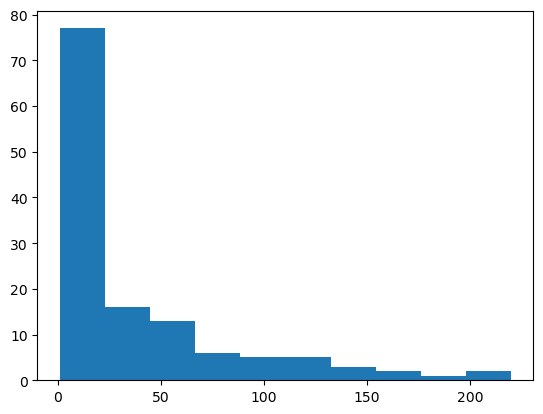

        co2_emission
mean       37.591615
median     15.200000


In [3]:
# Subset for food_category equals rice
rice_consumption = food_consumption.query("food_category == 'rice'")

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption.agg({'co2_emission':[np.mean, np.median]}))

### Quartiles, quantiles, and quintiles
Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In this exercise, you'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.

In [4]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, .25, .5, .75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [5]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, .2, .4, .6, .8, 1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [6]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


### Variance and standard deviation
Variance and standard deviation are two of the most common ways to measure the spread of a variable, and you'll practice calculating these in this exercise. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

In [7]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category').agg({'co2_emission':[np.var, np.std]}))

               co2_emission            
                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


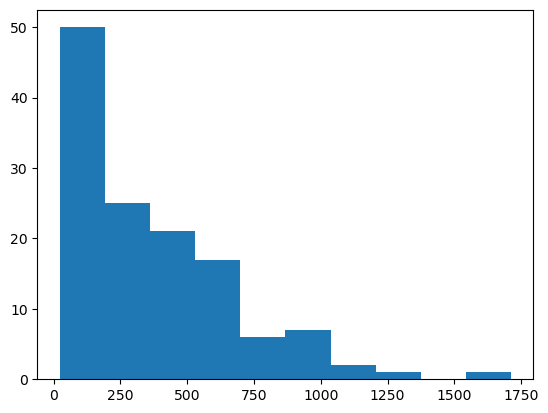

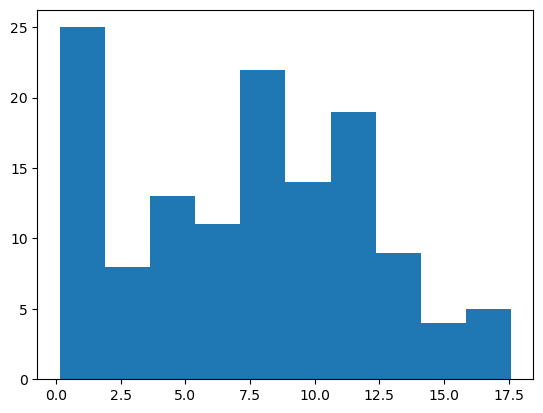

In [8]:
# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption.query("food_category=='beef'")['co2_emission'])
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption.query("food_category=='eggs'")['co2_emission'])
plt.show()

> Beef has the largest amount of variation in its CO2 emissions, while eggs have a relatively small amount of variation.


### Finding outliers using IQR
Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than or greater than, it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated.

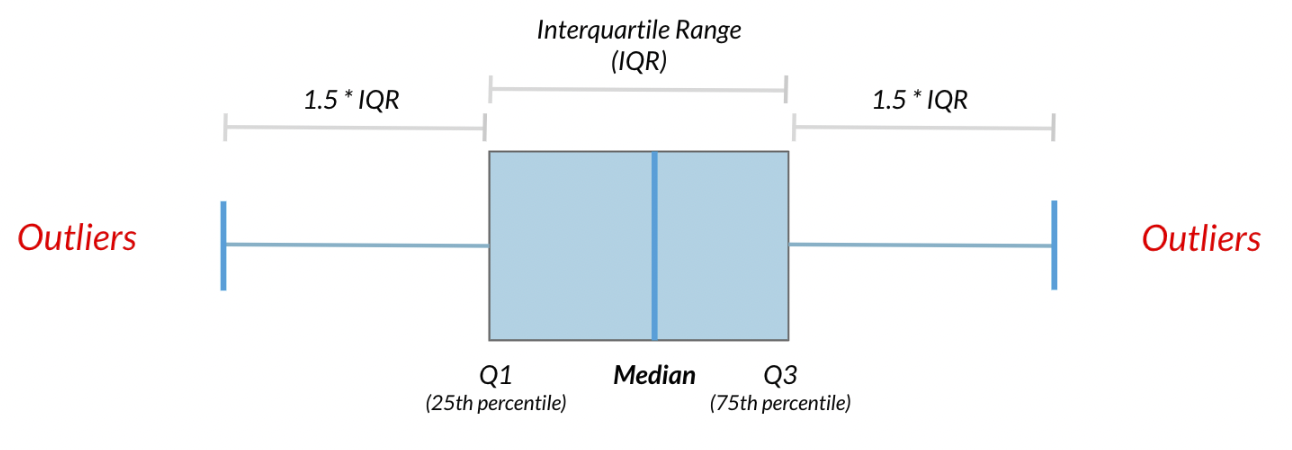

In [9]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].agg(np.sum)

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country > upper) | (emissions_by_country < lower)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


### Calculating probabilities
You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by

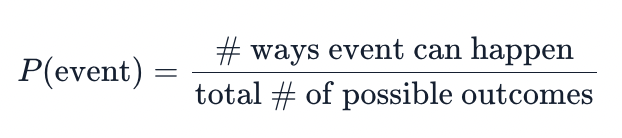

In [10]:
# Load data
amir_deals = pd.read_csv('../data/amir_deals.csv')
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


In [11]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


In [12]:
# Calculate probability of picking a deal with each product
probs = counts / amir_deals['product'].value_counts().sum()
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


### Sampling deals
In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

In [13]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5, replace=False)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [14]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


### Creating a probability distribution
A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum. 

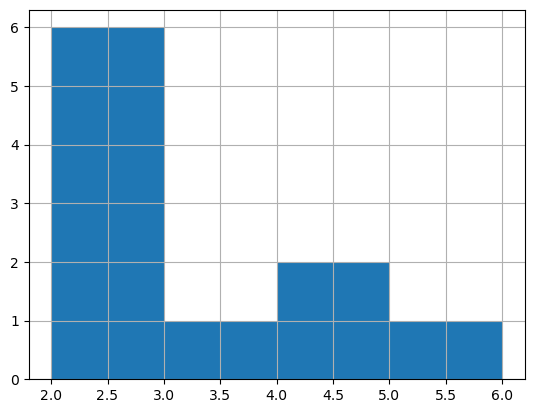

In [15]:
# Load data
restaurant_groups = pd.read_csv('../data/restaurant_groups.csv')

# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6])
plt.show()

In [16]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups['group_size'].value_counts().sum()

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1


In [17]:
# Calculate expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)

2.9000000000000004


In [18]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

In [19]:
# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

0.30000000000000004


### Data back-ups
The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

In [20]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


### Simulating wait times
To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

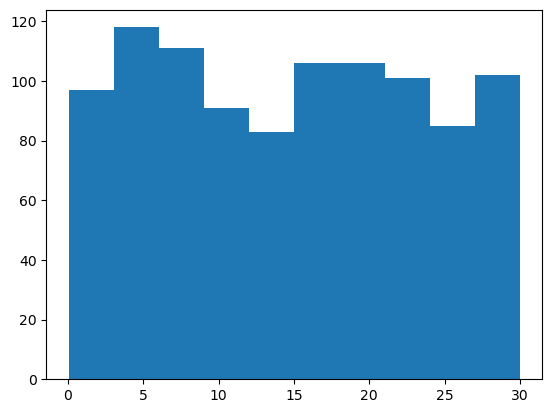

In [21]:
# Set random seed to 334
np.random.seed(334)

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

> Unless Amir figures out exactly what time each backup happens, he won't be able to time his data entry so it gets backed up sooner, but it looks like he'll wait about 15 minutes on average.

### Simulating sales deals
Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

In [22]:
# Set random seed to 10
np.random.seed(10)

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(deals.mean())

0.8269230769230769


> In this simulated year, Amir won 0.83 deals on average each week.

### Calculating binomial probabilities
Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.



In [23]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)
print(prob_3)

0.026999999999999996


In [24]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)
print(prob_less_than_or_equal_1)

0.784


In [25]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)
print(prob_greater_than_1)

0.21599999999999997


> Amir has about a 22% chance of closing more than one deal in a week.

### How many sales will be won?
Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by <math xmlns="http://www.w3.org/1998/Math/MathML"> <mi>n</mi> <mo>&#xD7;</mo> <mi>p</mi> </math>.

In [26]:
# Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
won_30pct = 3 * 0.3
print(won_30pct)

# Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.
won_25pct = 3 * 0.25
print(won_25pct)

# Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


> If Amir's win rate goes up by 5%, he can expect to close more than 1 deal on average each week.


### Distribution of Amir's sales
Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

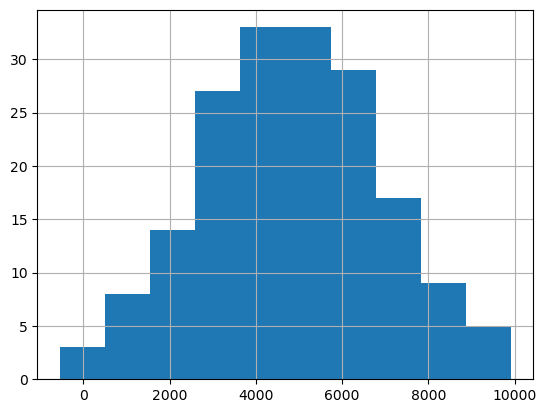

In [27]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()

> Now that you've visualized the data, you know that you can approximate probabilities of different amounts using the normal distribution.

### Probabilities from the normal distribution
Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.



In [28]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)
print(prob_less_7500)

0.8943502263331446


In [29]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)
print(prob_over_1000)

0.9772498680518208


In [30]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
print(prob_3000_to_7000)

0.6826894921370859


In [31]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)
print(pct_25)

3651.0204996078364


> You know that you can count on Amir 75% (1-0.25) of the time to make a sale worth at least $3651.02. This information could be useful in making company-wide sales projections.

### Simulating sales under new market conditions
The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales DataFrame, which has already been created for you.

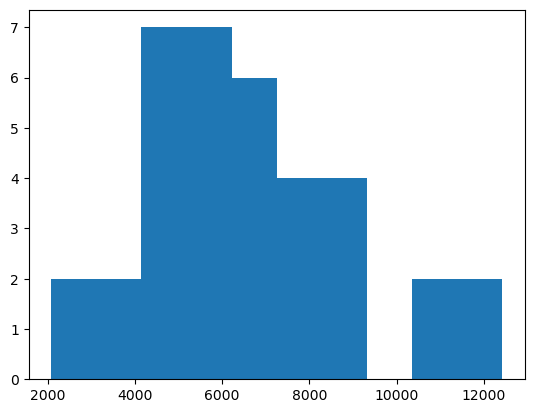

In [32]:
# Currently, Amir's average sale amount is $5000. Calculate what his new average amount will be if it increases by 20% and store this in new_mean
new_mean = 5000 * 0.20 + 5000

# Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd
new_sd = 2000 * 0.30 + 2000

# Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Plot the distribution of the new_sales amounts using a histogram and show the plot
plt.hist(new_sales)
plt.show()

> Although the average sale amount went up, the variation also increased, so it's not straightforward to decide whether these sales are better than his current ones. In the next exercise, you'll explore the effects of higher variation.

### The CLT in action
The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the num_users column of amir_deals more closely, which contains the number of people who intend to use the product Amir is selling.



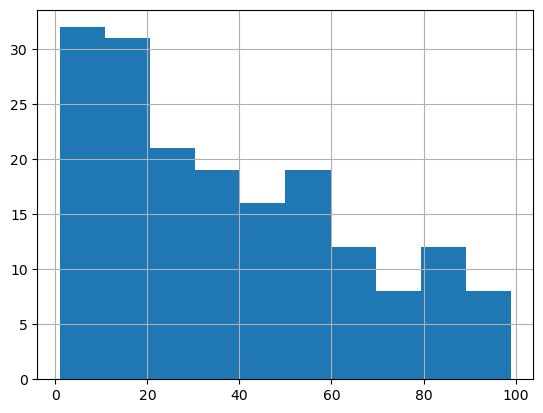

In [33]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

In [34]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# Take mean of samp_20
print(np.mean(samp_20))

32.0


In [35]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)

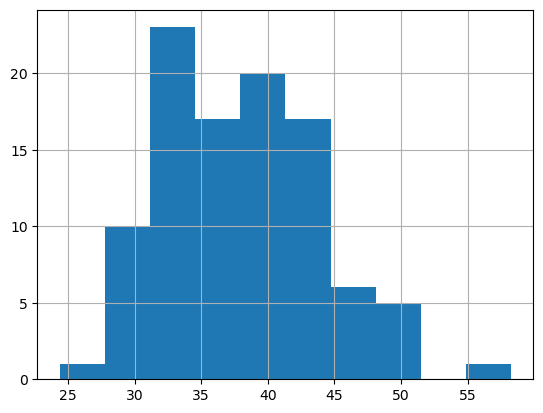

In [36]:
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

> You've just seen the central limit thorem at work. Even though the distribution of num_users is not normal, the distribution of its sample means resembles the normal distribution.



### Tracking lead responses
Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

In [37]:
# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)
print(prob_5)

0.1562934518505317


In [38]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)
print(prob_coworker)

0.17140068409793663


In [39]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)
print(prob_2_or_less)

0.23810330555354436


In [40]:
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)
print(prob_over_10)

0.0028397661205137315


### Modeling time between leads
To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, he responds to 1 request every 2.5 hours. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

In [41]:
# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

0.3296799539643607


In [42]:
# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))

0.20189651799465536


In [43]:
# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.09929769391754684


> There's only about a 20% chance it will take Amir more than 4 hours to respond, so he's pretty speedy in his responses.



### Relationships between variables
In this chapter, you'll be working with a dataset world_happiness containing results from the 2019 World Happiness Report. The report scores various countries based on how happy people in that country are. It also ranks each country on various societal aspects such as social support, freedom, corruption, and others. The dataset also includes the GDP per capita and life expectancy for each country.

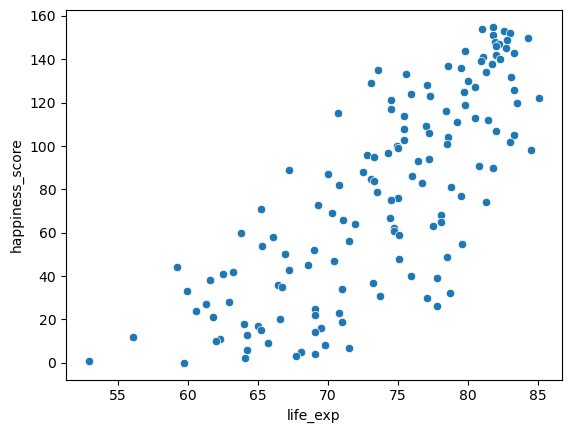

In [44]:
world_happiness = pd.read_csv('../data/world_happiness.csv')

# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)
plt.show()

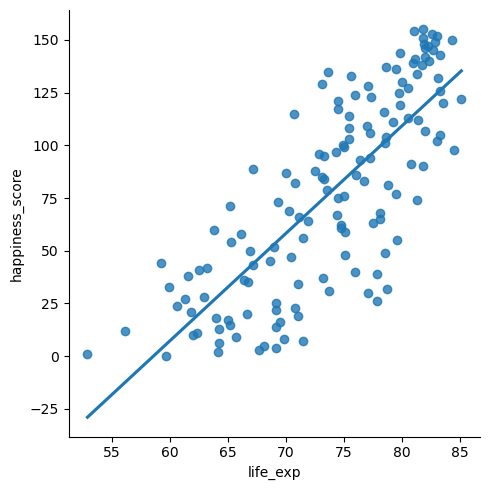

In [45]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)
plt.show()

In [46]:
# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])
print(cor)

0.7802249053272062


### What can't correlation measure?
While the correlation coefficient is a convenient way to quantify the strength of a relationship between two variables, it's far from perfect. In this exercise, you'll explore one of the caveats of the correlation coefficient by examining the relationship between a country's GDP per capita (gdp_per_cap) and happiness score.

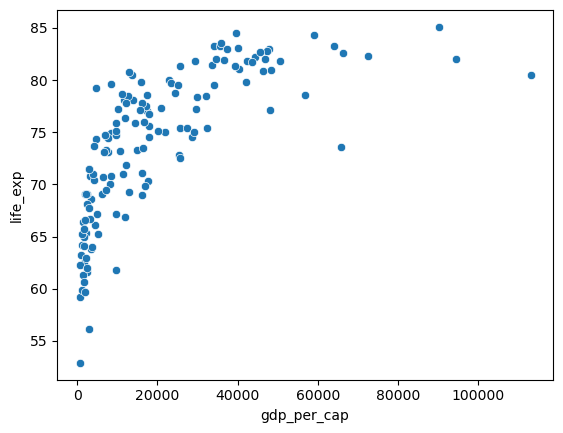

In [47]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)
plt.show()

In [48]:
# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])
print(cor)

0.7019547642148015


### Transforming variables
When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable so that correlation can be computed. In this exercise, you'll perform a transformation yourself.

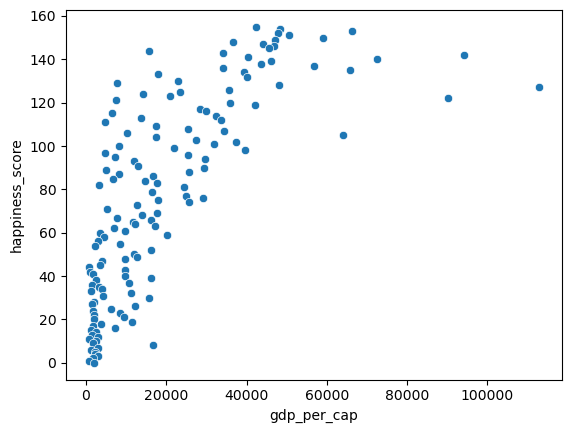

0.7279733012222975


In [49]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

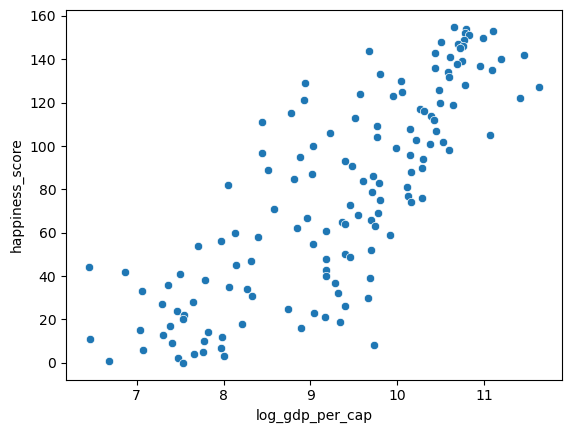

0.8043146004918288


In [50]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

> The relationship between GDP per capita and happiness became more linear by applying a log transformation. Log transformations are great to use on variables with a skewed distribution, such as GDP.

### Does sugar improve happiness?
A new column has been added to world_happiness called grams_sugar_per_day, which contains the average amount of sugar eaten per person per day in each country. In this exercise, you'll examine the effect of a country's average sugar consumption on its happiness score.

In [59]:
grams_sugar_per_day = [ 86.8, 152. , 120. , 132. , 122. , 166. , 115. , 162. , 132. ,
       124. , 126. , 144. ,  76.2, 141. , 113. , 126. , 133. , 144. ,
       175. , 118. , 101. , 168. , 133. , 107. , 131. , 132. ,  86.8,
        85.6,  95.3, 117. , 111. , 113. ,  88. , 162. , 122. ,  27.6,
       130. , 160. ,  75.1, 116. , 132. ,  70.1, 101. ,  63.3, 106. ,
       109. , 117. , 105. ,  86.5, 135. ,  96. ,  74.2, 131. ,  78.4,
        75.2,  95. ,  69.6,  62.9,  78. ,  76. , 134. ,  64.6,  77.1,
        64.6, 131. ,  51.9, 118. ,  95.3,  87.3, 121. , 107. ,  80.3,
        40.3,  29.4,  24.6,  78.2, 109. ,  50.5, 123. ,  46.5,  18.8,
        27.4,  27.2,  78.7,  40.5,  13. , 128. ,  21.4,  42.6, 101. ,
       131. , 106. ,  51.5,  50. ,  55.4,  14.5,  20.3,  97.4,  79.8,
        27.2,  93.1,  72.2,  43.7,  99.2,  30.7,  95.5,  22.1,  52.8,
        28.1,  16.5,  73.4,  46.2,  29.1, 126. ,  18.1,  95.3,  32.4,
        78. ,  28.1,  33.3,  64.2,  15.5,  20.3,  45.5,  80.6,  45.8,
        85. ,  22.6,  77.9,  14.1,  28. ,  24.5,  22.4, 111. , 113. ,  88. , 162. , 122. ,  27.6,
       130. , 160. ,  75.1, 116.]
world_happiness['grams_sugar_per_day'] = grams_sugar_per_day

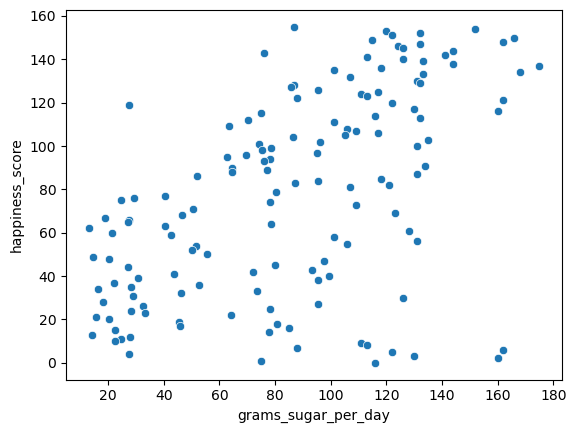

0.5306244913542834


In [61]:
# Scatterplot of grams_sugar_per_day and happiness_score
sns.scatterplot(x='grams_sugar_per_day', y='happiness_score', data=world_happiness)
plt.show()

# Correlation between grams_sugar_per_day and happiness_score
cor = world_happiness['grams_sugar_per_day'].corr(world_happiness['happiness_score'])
print(cor)

> Increased sugar consumption is associated with a higher happiness score. If correlation always implied that one thing causes another, people may do some nonsensical things, like eat more sugar to be happier.